In [1]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.cm as cm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

## Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


## Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

## Data Loading

In [5]:
df = pd.read_csv('adult.csv')

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df.shape

(32561, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [18]:
round((df.isin(['?']).sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [20]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [22]:
income = df['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

income
<=50K    75.92 %
>50K     24.08 %
Name: proportion, dtype: object

Observations

The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.<br>
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

## Data Visualization

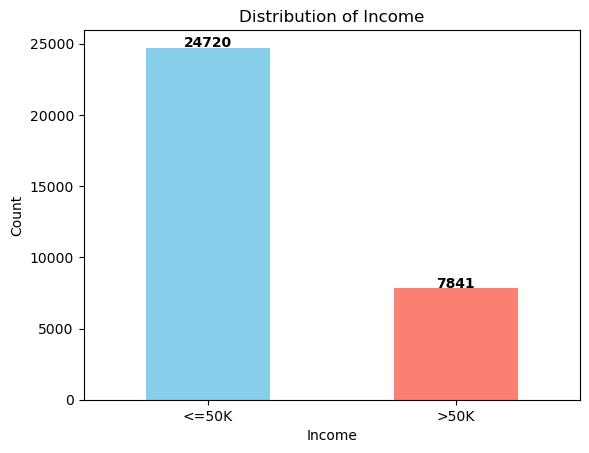

In [26]:
# Calculating the counts of each income category
income_counts = df['income'].value_counts()

# Plotting the income distribution
ax = income_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Adding labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.xticks(rotation=0)

# Adding value labels on top of each bar
for i, v in enumerate(income_counts):
    ax.text(i, v + 50, str(v), ha='center', fontweight='bold')  # Adjust +50 as needed for better positioning

plt.show();

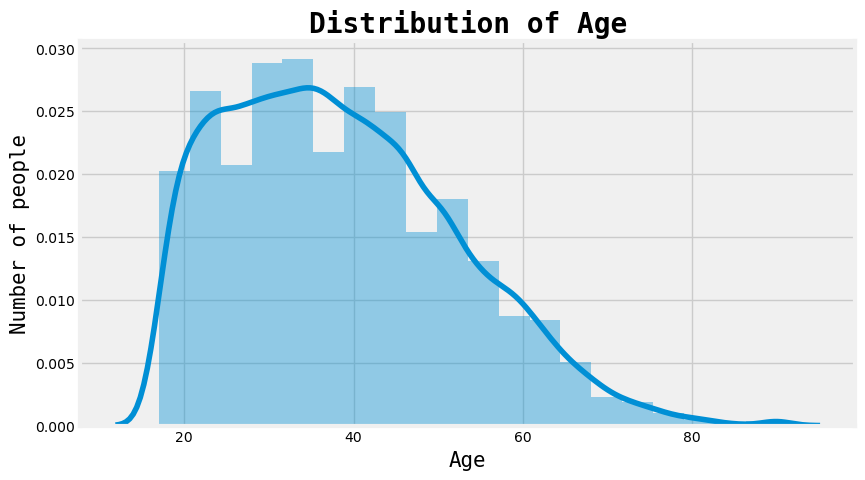

In [27]:
age = df['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show();

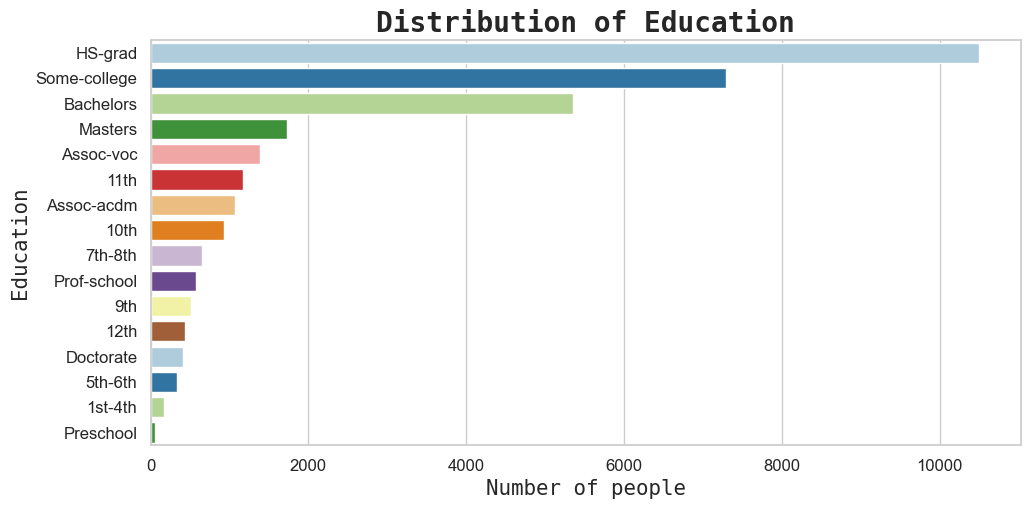

In [30]:
edu = df['education'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=edu.values, y=edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)

plt.show();

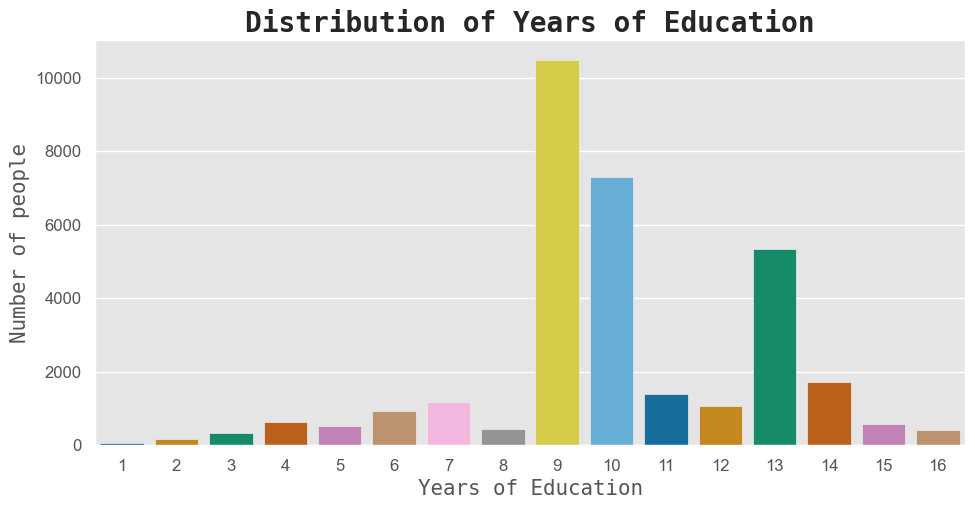

In [32]:
edu_num = df['education.num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_num.index, y=edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show();

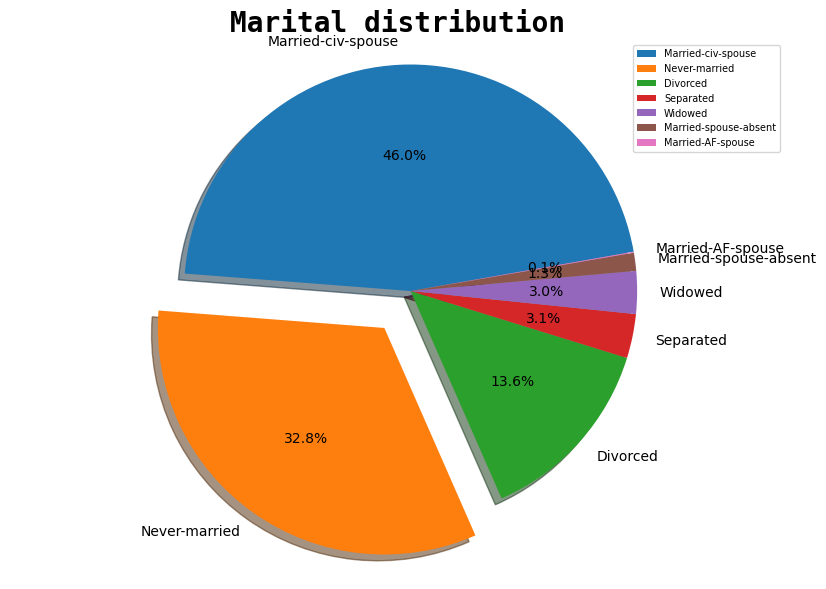

In [33]:
marital = df['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show();

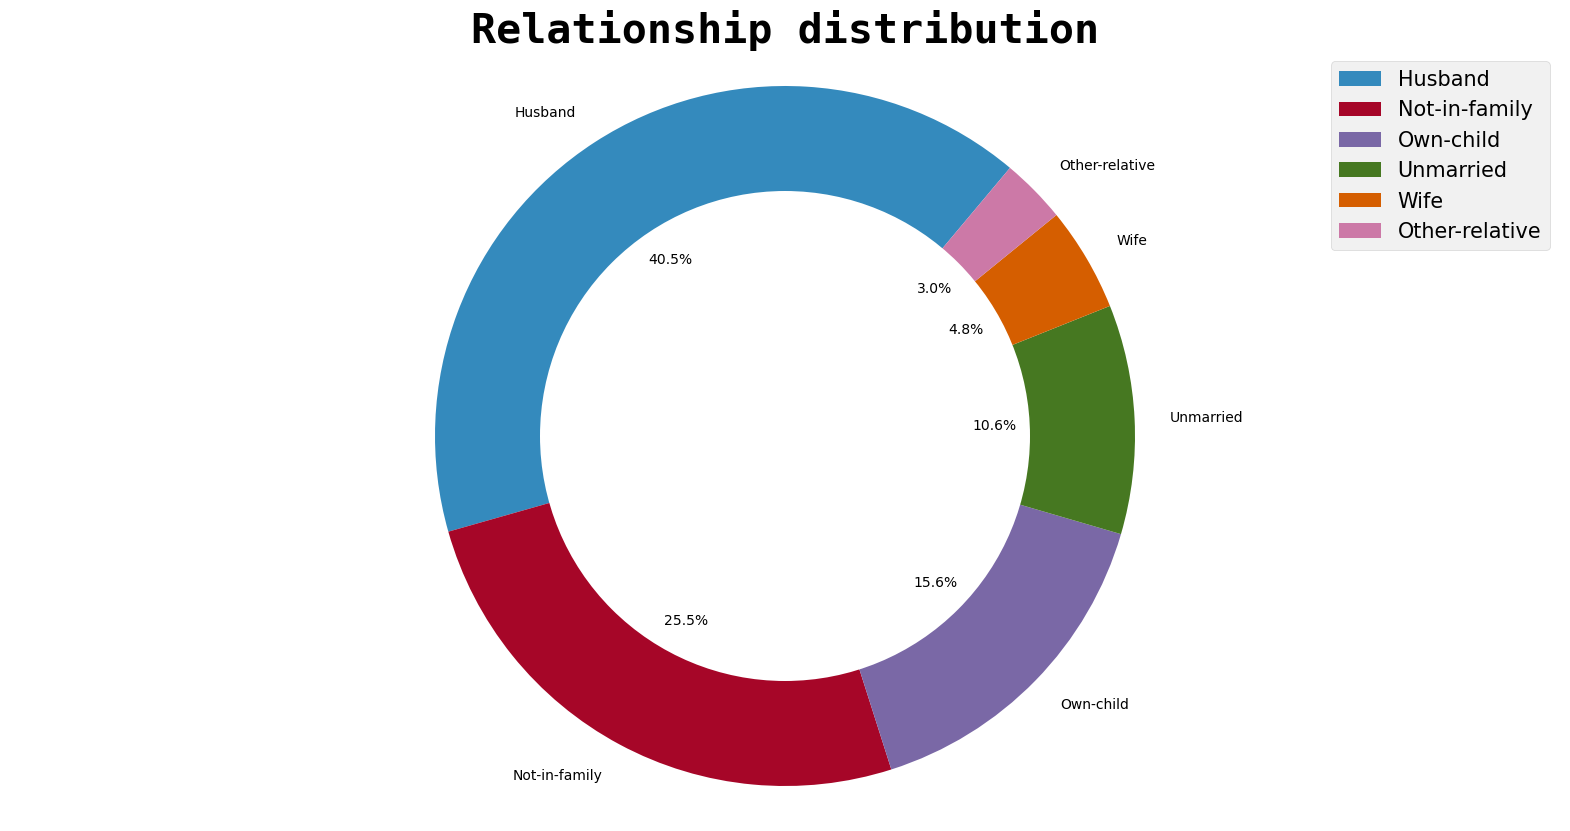

In [36]:
relation = df['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show();

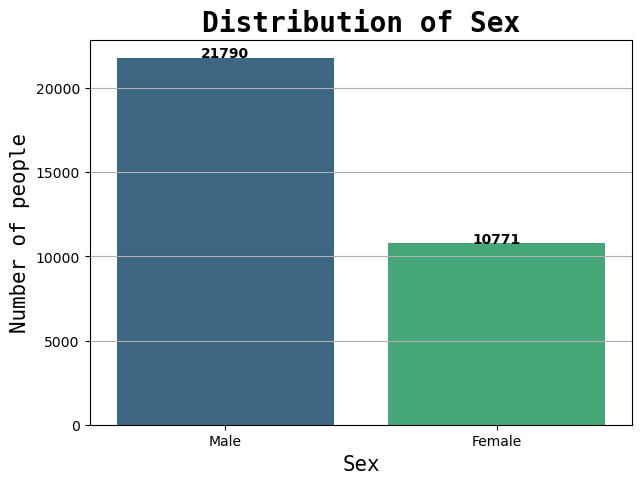

In [38]:
sex = df['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=sex.index, y=sex.values, palette='viridis')  # Adding color palette is optional

plt.title('Distribution of Sex', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid(axis='y')

# Adding value labels on top of each bar
for i, v in enumerate(sex.values):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')  # Adjust +10 for spacing as needed

plt.show();

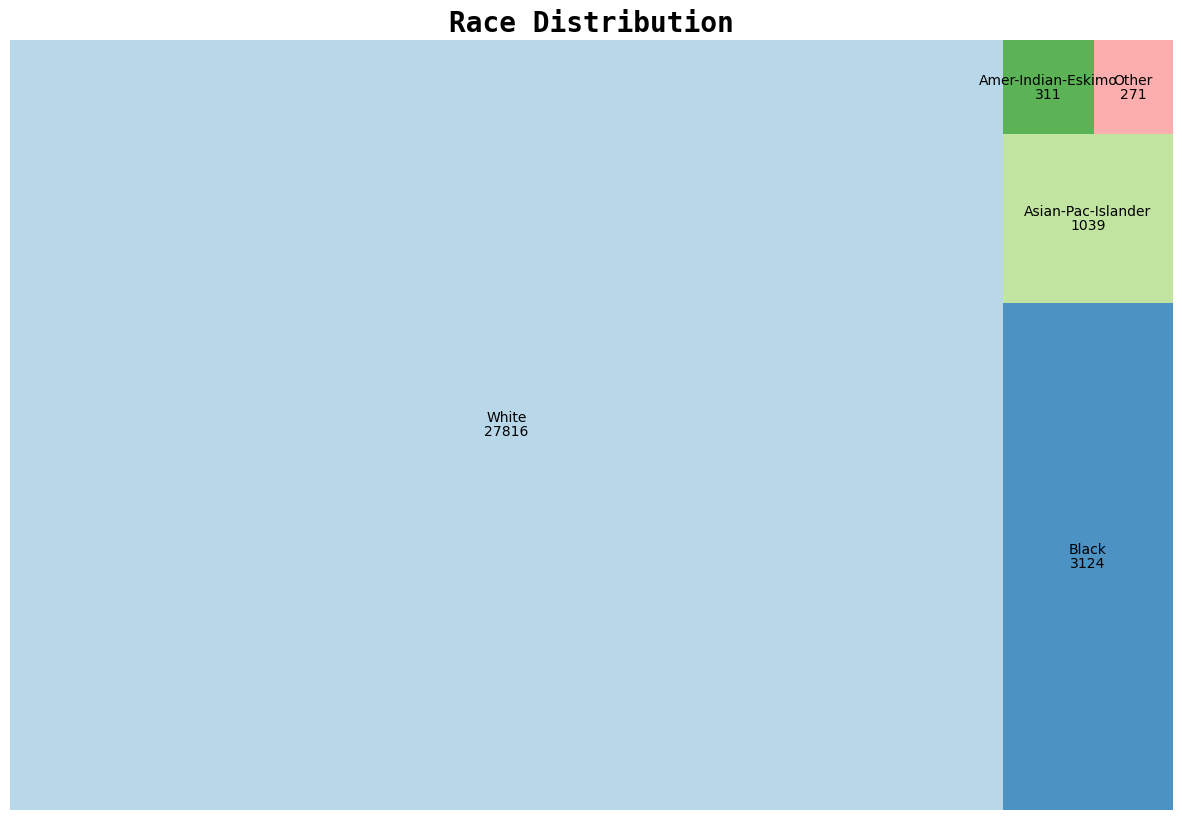

In [40]:
race = df['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(15, 10))

# Using a colormap for colors
colors = cm.Paired(range(len(race)))  # You can change 'Paired' to any other colormap like 'viridis', 'plasma', etc.

# Plotting the treemap with custom colors
squarify.plot(sizes=race.values, label=race.index, value=race.values, color=colors, alpha=0.8)

# Adding title
plt.title('Race Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.axis('off')  # Turns off the axis
plt.show();

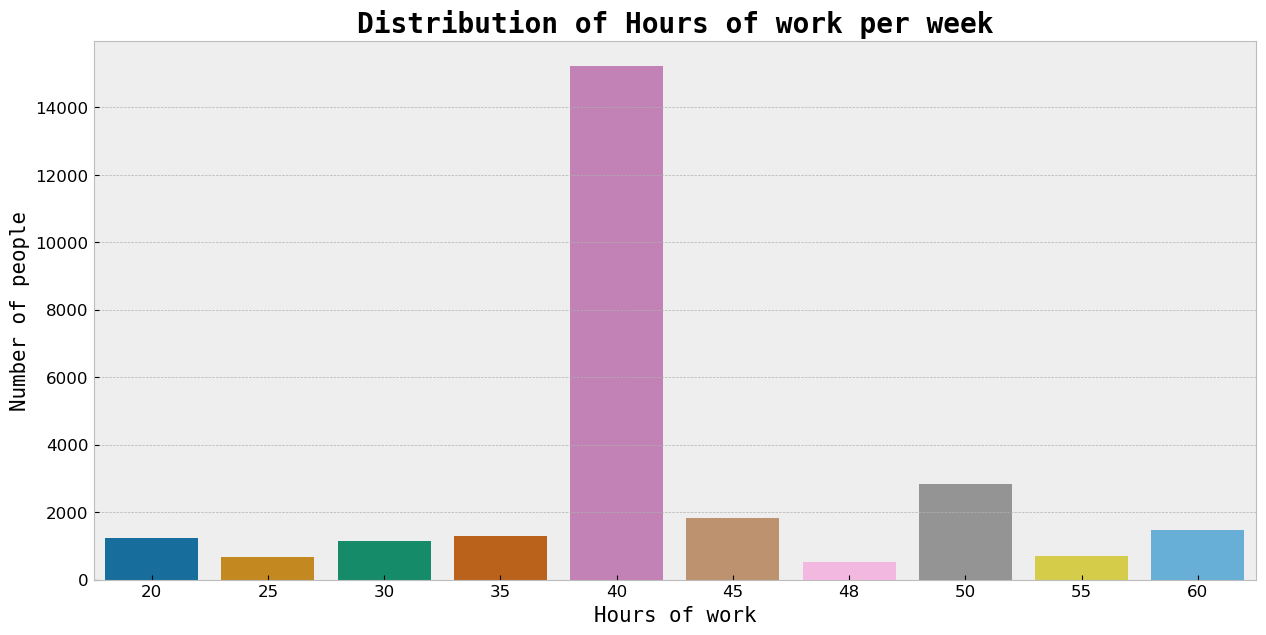

In [42]:
hours = df['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index, y=hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)

plt.show();

In [44]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<Axes: >

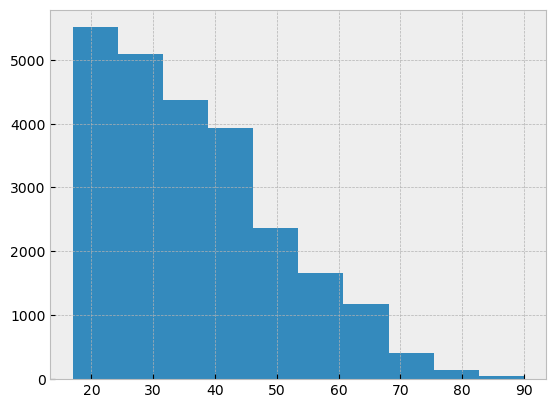

In [46]:
df[df['income'] == '<=50K']['age'].hist()

<Axes: >

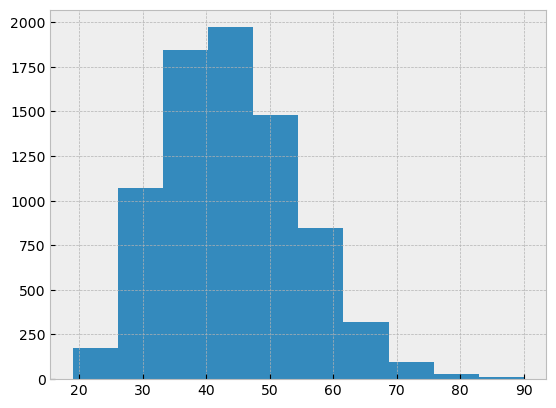

In [48]:
df[df['income'] == '>50K']['age'].hist()

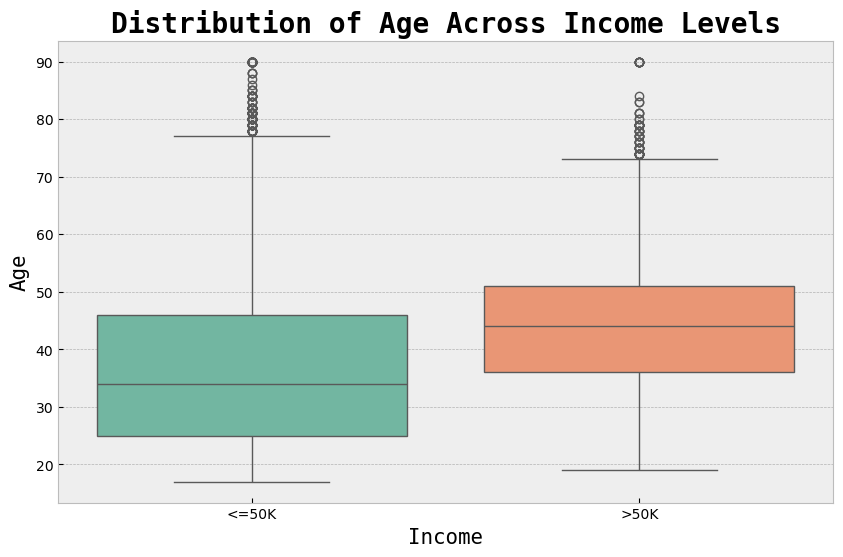

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df, palette='Set2')

# Adding labels and title
plt.title('Distribution of Age Across Income Levels', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.show();


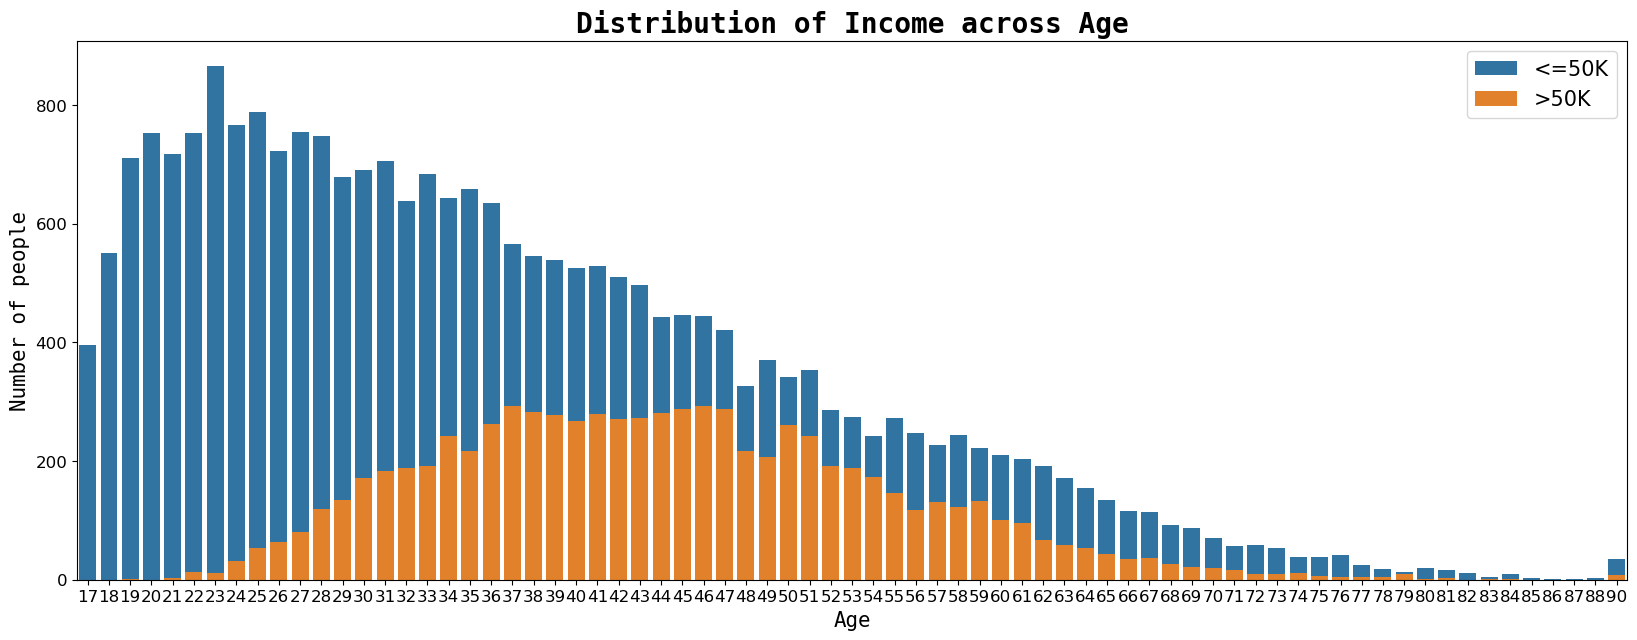

In [52]:
plt.style.use('default')
plt.figure(figsize=(20, 7))

# Filter dataset for different income categories
income_categories = df['income'].unique()
for category in income_categories:
    sns.countplot(x='age', data=df[df['income'] == category], label=category)

plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show();

In [53]:
df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [56]:
df_edu = df[df['education'].isin(['HS-grad','Some-college','Bachelors','Masters','Doctorate','Assoc-voc'])]

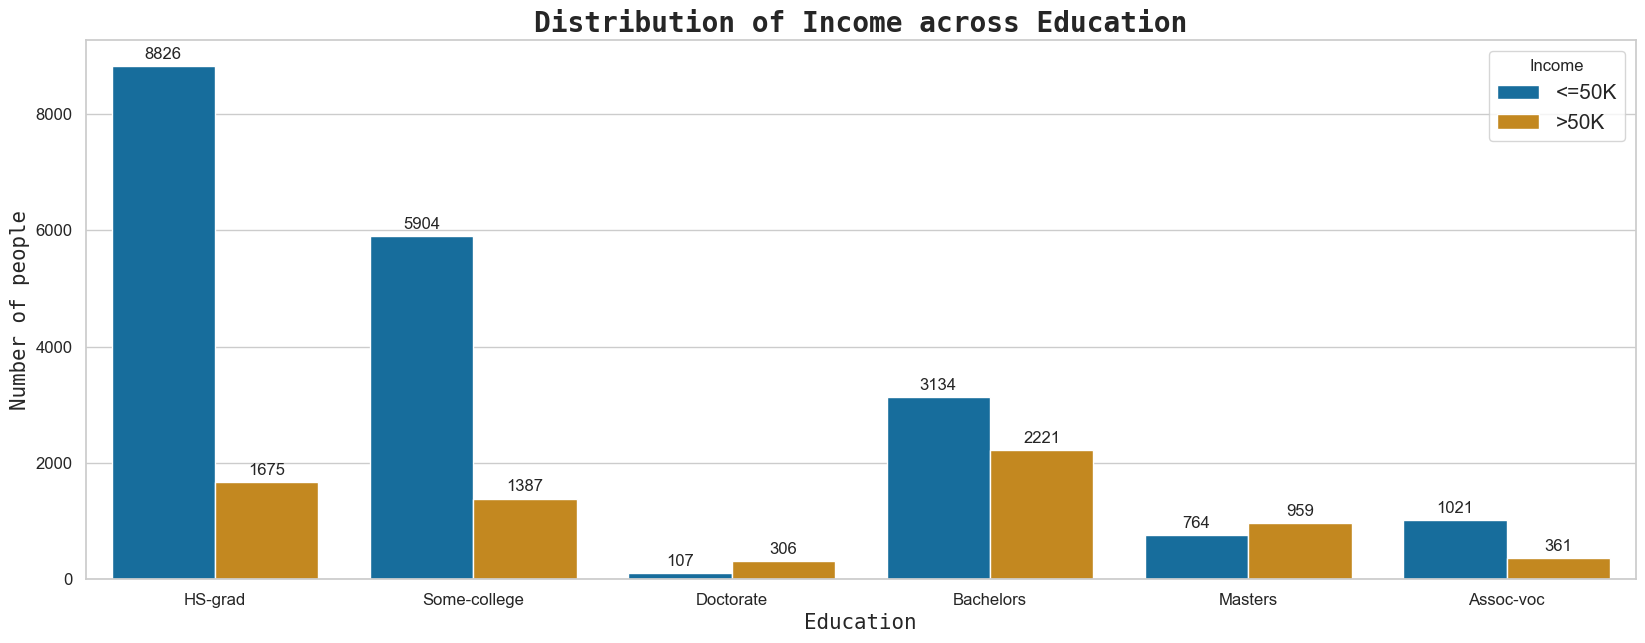

In [58]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 7))

# Creating the countplot
ax = sns.countplot(x='education', hue='income', data=df_edu, palette='colorblind')

# Adding title and labels
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(title='Income', loc='upper right', prop={'size': 15})

# Adding counts to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

plt.show();

Observations

In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

## Data Pre-processing

### Fixing "?"

In [63]:
dataset = df.replace('?', np.nan)

In [65]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [67]:
dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [69]:
dataset['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [71]:
dataset['occupation'] = np.where(dataset['occupation'].isin(['Transport-moving','Handlers-cleaners','Farming-fishing','Tech-support','Protective-serv','Priv-house-serv','Armed-Forces']), "Other-service", dataset['occupation']) 

In [73]:
dataset['occupation'].value_counts()

occupation
Other-service        8991
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Name: count, dtype: int64

In [75]:
dataset['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [77]:
dataset['workclass'] = np.where(dataset['workclass'].isin(['Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']), "Other", dataset['workclass']) 

In [79]:
dataset['workclass'].value_counts()

workclass
Private    22696
Other       8029
Name: count, dtype: int64

In [81]:
dataset['occupation'].value_counts()

occupation
Other-service        8991
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Name: count, dtype: int64

In [83]:
dataset['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [85]:
dataset['native.country'] = np.where(dataset['native.country']!='United-States','Other', dataset['native.country']) 

In [87]:
dataset['native.country'].value_counts()

native.country
United-States    29170
Other             3391
Name: count, dtype: int64

In [89]:
dataset['marital.status'].value_counts()

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [91]:
dataset['marital.status'] = np.where(dataset['marital.status'].isin(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']), "Married", dataset['marital.status'])
dataset['marital.status'] = np.where(dataset['marital.status'].isin(['Never-married','Widowed','Divorced','Separated']), "Single", dataset['marital.status'])

In [93]:
dataset['marital.status'].value_counts()

marital.status
Single     17144
Married    15417
Name: count, dtype: int64

In [95]:
dataset['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [97]:
dataset['race'] = np.where(dataset['race'].isin(['Black','Asian-Pac-Islander','Amer-Indian-Eskimo']), "Other", dataset['race'])

In [99]:
dataset['race'].value_counts()

race
White    27816
Other     4745
Name: count, dtype: int64

In [101]:
dataset['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [103]:
dataset['education'] = np.where(dataset['education'].isin(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','Prof-school']), "school", dataset['education']) 
dataset['education'] = np.where(dataset['education'].isin(['Some-college','Assoc-voc','Assoc-acdm']), "college", dataset['education']) 
dataset['education'] = np.where(dataset['education'].isin(['Masters','Doctorate']), "graduation", dataset['education'])

In [105]:
dataset['education'].value_counts()

education
HS-grad       10501
college        9740
Bachelors      5355
school         4829
graduation     2136
Name: count, dtype: int64

In [107]:
dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64

In [109]:
columns_with_nan = ['workclass', 'occupation']

In [111]:
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [113]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Label Encoding

In [116]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Single,Other-service,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Single,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,college,10,Single,Other-service,Unmarried,Other,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,school,4,Single,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,college,10,Single,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [118]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

In [120]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,1,77053,1,9,1,4,1,1,0,0,4356,40,1,0
1,82,1,132870,1,9,1,2,1,1,0,0,4356,18,1,0
2,66,1,186061,2,10,1,4,4,0,0,0,4356,40,1,0
3,54,1,140359,4,4,1,3,4,1,0,0,3900,40,1,0
4,41,1,264663,2,10,1,5,3,1,0,0,3900,40,1,0


## Feature Selection

In [123]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [125]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [127]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [129]:
feature_imp = selector.feature_importances_

In [131]:
feature_imp

array([0.16756787, 0.01353811, 0.19335336, 0.03698894, 0.0889183 ,
       0.11967564, 0.06652914, 0.05748911, 0.00878932, 0.02037499,
       0.08625535, 0.02798666, 0.10374519, 0.00878804])

In [133]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 16.76
1 1.35
2 19.34
3 3.7
4 8.89
5 11.97
6 6.65
7 5.75
8 0.88
9 2.04
10 8.63
11 2.8
12 10.37
13 0.88


In [135]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [137]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

## Feature Scaling

In [140]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [142]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    75.92 %
1    24.08 %
Name: proportion, dtype: object

In [144]:
ros = RandomOverSampler(random_state=42)

In [146]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [148]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [150]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

### Train test Split

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [155]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


## Data Modelling and Performance Evaluations

### Logistic Regression

In [159]:
log_reg = LogisticRegression()

In [161]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [163]:
# Predictions
Y_pred = log_reg.predict(X_test)

# Performance Metrics
accuracy_log = accuracy_score(Y_test, Y_pred)* 100
precision_log = precision_score(Y_test, Y_pred)* 100
recall_log = recall_score(Y_test, Y_pred)* 100
f1_log = f1_score(Y_test, Y_pred)* 100
roc_auc_log = roc_auc_score(Y_test, Y_pred)* 100

print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1-score:", f1_log)
print("ROC AUC:", roc_auc_log)

Accuracy: 80.97694174757282
Precision: 79.36874518860661
Recall: 83.6002432596797
F1-score: 81.42955869286209
ROC AUC: 80.98276542398717


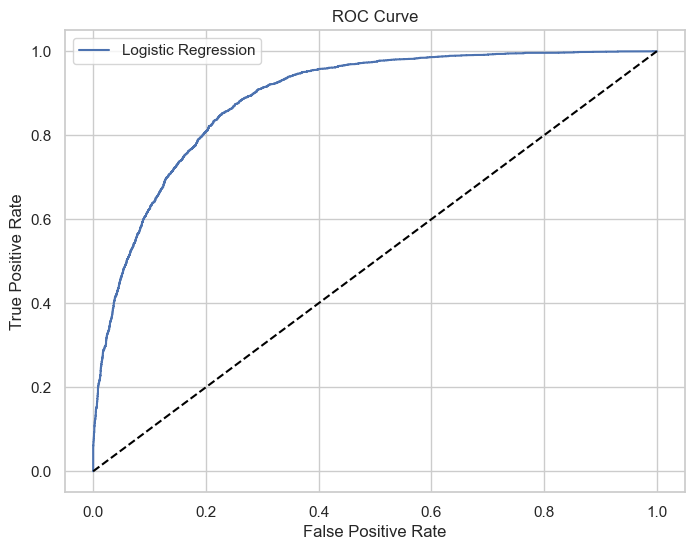

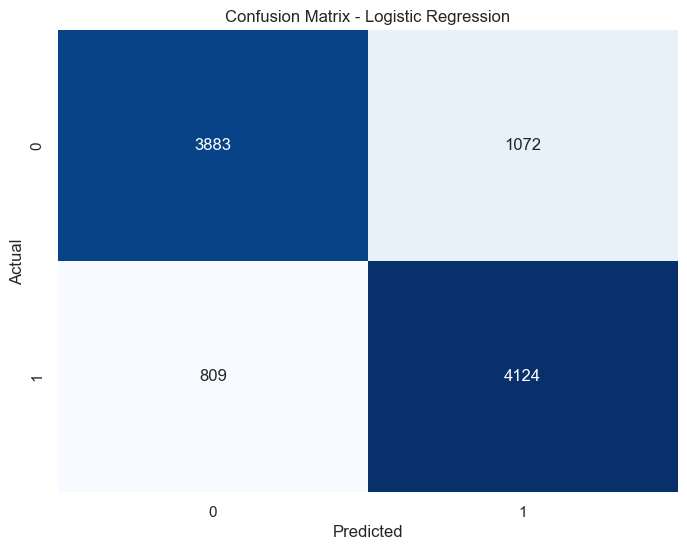

In [165]:
# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, log_reg.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show();

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

In [230]:
cm

array([[3883, 1072],
       [ 809, 4124]], dtype=int64)

In [240]:
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

In [242]:
tpr_log =  tp/(tp+fn)

In [244]:
tpr_log

0.8360024325967971

In [250]:
fpr_log = fp/(fp+tn)

In [252]:
fpr_log

0.21634712411705348

### KNN Classifer

In [168]:
knn = KNeighborsClassifier()


# Train KNN model
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [170]:
# Predictions
Y_pred_knn = knn.predict(X_test)

# Performance Metrics
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)* 100
precision_knn = precision_score(Y_test, Y_pred_knn)* 100
recall_knn = recall_score(Y_test, Y_pred_knn)* 100
f1_knn = f1_score(Y_test, Y_pred_knn)* 100
roc_auc_knn = roc_auc_score(Y_test, Y_pred_knn)* 100

print("Accuracy (KNN):", accuracy_knn)
print("Precision (KNN):", precision_knn)
print("Recall (KNN):", recall_knn)
print("F1-score (KNN):", f1_knn)
print("ROC AUC (KNN):", roc_auc_knn)

Accuracy (KNN): 83.4546925566343
Precision (KNN): 79.42173835445297
Recall (KNN): 90.20879789174944
F1-score (KNN): 84.47228549734245
ROC AUC (KNN): 83.46968653416937


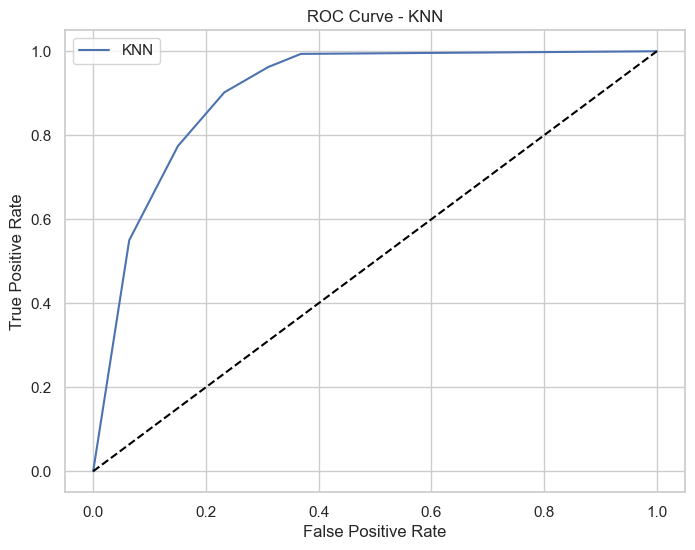

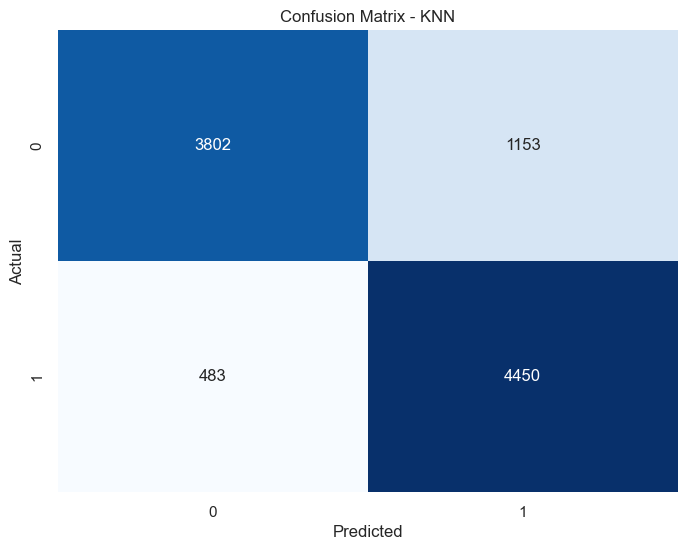

In [171]:
# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(Y_test, knn.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show();

# Confusion Matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

In [254]:
cm_knn

array([[3802, 1153],
       [ 483, 4450]], dtype=int64)

In [256]:
tp = cm_knn[1][1]
tn = cm_knn[0][0]
fp = cm_knn[0][1]
fn = cm_knn[1][0]

In [258]:
tpr_knn =  tp/(tp+fn)

In [262]:
tpr_knn

0.9020879789174944

In [260]:
fpr_knn = fp/(fp+tn)

In [264]:
fpr_knn

0.23269424823410698

### Support Vector Classifier

In [175]:
svc = SVC(probability=True)

In [177]:
svc.fit(X_train, Y_train)

SVC(probability=True)

In [179]:
Y_pred_svc = svc.predict(X_test)

In [181]:
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)* 100
precision_svc = precision_score(Y_test, Y_pred_svc)* 100
recall_svc = recall_score(Y_test, Y_pred_svc)* 100
f1_svc = f1_score(Y_test, Y_pred_svc)* 100
roc_auc_svc = roc_auc_score(Y_test, Y_pred_svc)* 100

print("Accuracy (SVC):", accuracy_svc)
print("Precision (SVC):", precision_svc)
print("Recall (SVC):", recall_svc)
print("F1-score (SVC):", f1_svc)
print("ROC AUC (SVC):", roc_auc_svc)

Accuracy (SVC): 81.76577669902912
Precision (SVC): 78.27972533429707
Recall (SVC): 87.8167443746199
F1-score (SVC): 82.77443393522499
ROC AUC (SVC): 81.77920972515051


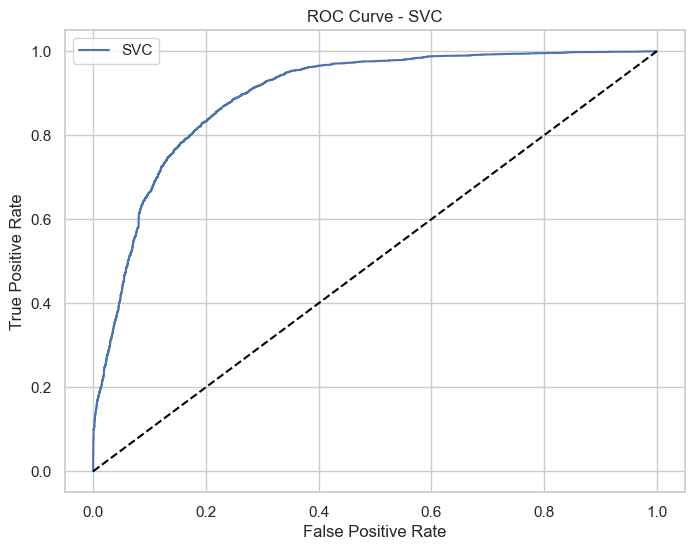

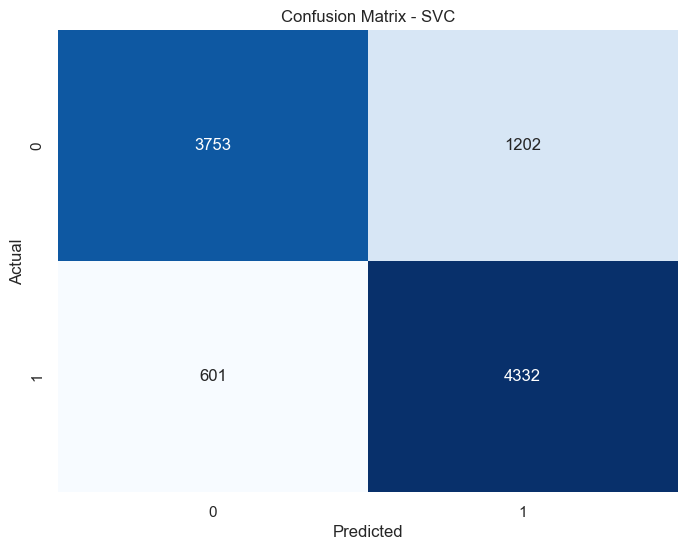

In [183]:
# ROC Curve
fpr_svc, tpr_svc, _ = roc_curve(Y_test, svc.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label="SVC")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve - SVC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show();

# Confusion Matrix
cm_svc = confusion_matrix(Y_test, Y_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

In [266]:
cm_svc

array([[3753, 1202],
       [ 601, 4332]], dtype=int64)

In [268]:
tp = cm_svc[1][1]
tn = cm_svc[0][0]
fp = cm_svc[0][1]
fn = cm_svc[1][0]

In [270]:
tpr_svc =  tp/(tp+fn)

In [274]:
tpr_svc

0.878167443746199

In [272]:
fpr_svc = fp/(fp+tn)

In [276]:
fpr_svc

0.2425832492431887

### Naive Bayes Classifier

In [186]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [188]:
# Predictions
Y_pred_nb = nb_classifier.predict(X_test)

# Performance Metrics
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)* 100
precision_nb = precision_score(Y_test, Y_pred_nb)* 100
recall_nb = recall_score(Y_test, Y_pred_nb)* 100
f1_nb = f1_score(Y_test, Y_pred_nb)* 100
roc_auc_nb = roc_auc_score(Y_test, Y_pred_nb)* 100

print("Accuracy (Naive Bayes):", accuracy_nb)
print("Precision (Naive Bayes):", precision_nb)
print("Recall (Naive Bayes):", recall_nb)
print("F1-score (Naive Bayes):", f1_nb)
print("ROC AUC (Naive Bayes):", roc_auc_nb)

Accuracy (Naive Bayes): 68.19377022653723
Precision (Naive Bayes): 88.97122929380994
Recall (Naive Bayes): 41.3744171903507
F1-score (Naive Bayes): 56.48263456482635
ROC AUC (Naive Bayes): 68.13423180405526


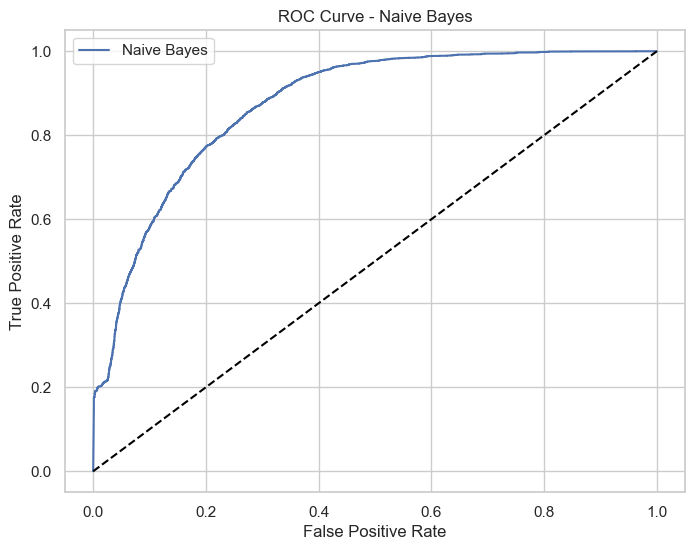

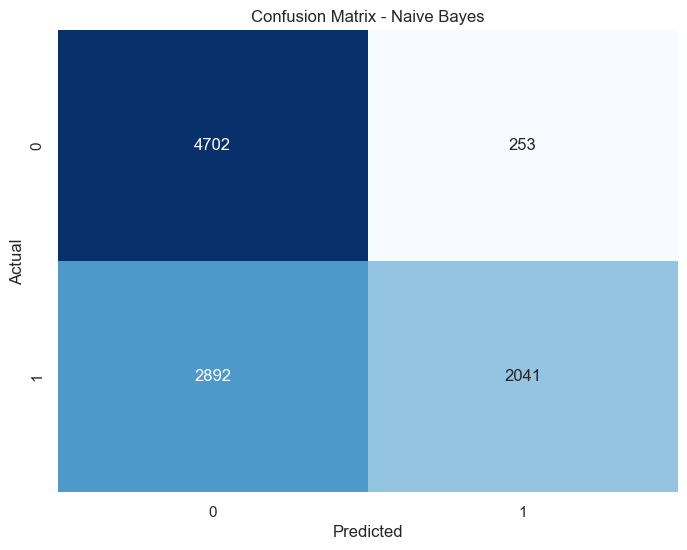

In [190]:
fpr_nb, tpr_nb, _ = roc_curve(Y_test, nb_classifier.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve - Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show();

# Confusion Matrix
cm_nb = confusion_matrix(Y_test, Y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

In [278]:
cm_nb

array([[4702,  253],
       [2892, 2041]], dtype=int64)

In [280]:
tp = cm_nb[1][1]
tn = cm_nb[0][0]
fp = cm_nb[0][1]
fn = cm_nb[1][0]

In [282]:
tpr_nb =  tp/(tp+fn)

In [286]:
tpr_nb

0.413744171903507

In [284]:
fpr_nb = fp/(fp+tn)

In [288]:
fpr_nb

0.051059535822401615

### Decision Tree Classifier

In [193]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [195]:
Y_pred_dt = dt_classifier.predict(X_test)

# Performance Metrics
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)* 100
precision_dt = precision_score(Y_test, Y_pred_dt)* 100
recall_dt = recall_score(Y_test, Y_pred_dt)* 100
f1_dt = f1_score(Y_test, Y_pred_dt)* 100
roc_auc_dt = roc_auc_score(Y_test, Y_pred_dt)* 100

print("Accuracy (Decision Tree):", accuracy_dt)
print("Precision (Decision Tree):", precision_dt)
print("Recall (Decision Tree):", recall_dt)
print("F1-score (Decision Tree):", f1_dt)
print("ROC AUC (Decision Tree):", roc_auc_dt)

Accuracy (Decision Tree): 91.41383495145631
Precision (Decision Tree): 87.12727272727273
Recall (Decision Tree): 97.14169876342996
F1-score (Decision Tree): 91.86235981980255
ROC AUC (Decision Tree): 91.42655069352124


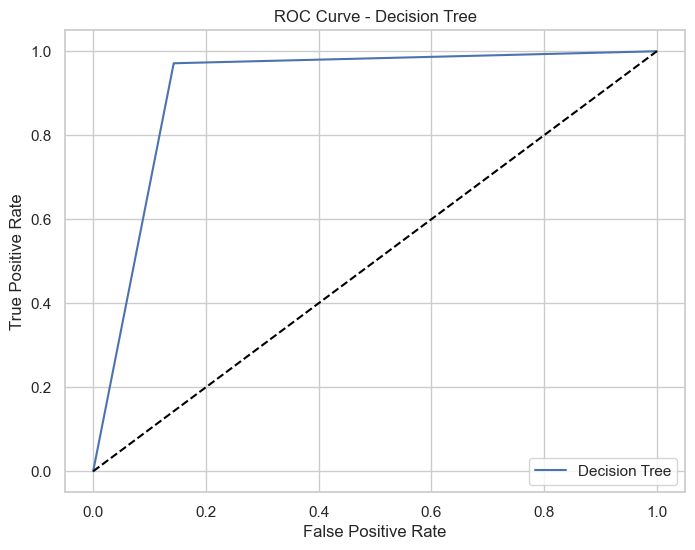

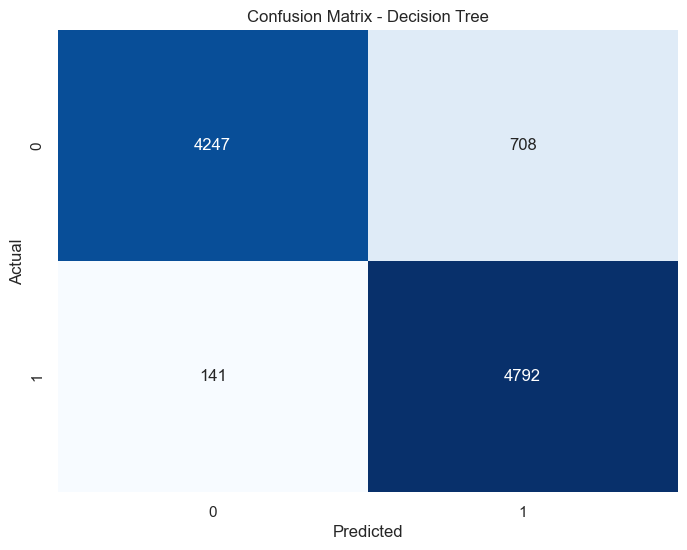

In [197]:
fpr_dt, tpr_dt, _ = roc_curve(Y_test, dt_classifier.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show();

# Confusion Matrix
cm_dt = confusion_matrix(Y_test, Y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

In [290]:
cm_dt

array([[4247,  708],
       [ 141, 4792]], dtype=int64)

In [292]:
tp = cm_dt[1][1]
tn = cm_dt[0][0]
fp = cm_dt[0][1]
fn = cm_dt[1][0]

In [294]:
tpr_dt =  tp/(tp+fn)

In [298]:
tpr_dt

0.9714169876342996

In [296]:
fpr_dt = fp/(fp+tn)

In [300]:
fpr_dt

0.14288597376387488

### Random Forest classifier

In [200]:
# Initialize Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Train Random Forest Classifier model
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [201]:
# Predictions
Y_pred_rf = rf_classifier.predict(X_test)

# Performance Metrics
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)* 100
precision_rf = precision_score(Y_test, Y_pred_rf)* 100
recall_rf = recall_score(Y_test, Y_pred_rf)* 100
f1_rf = f1_score(Y_test, Y_pred_rf)* 100
roc_auc_rf = roc_auc_score(Y_test, Y_pred_rf)* 100

print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1-score (Random Forest):", f1_rf)
print("ROC AUC (Random Forest):", roc_auc_rf)

Accuracy (Random Forest): 92.23300970873787
Precision (Random Forest): 88.10612991765782
Recall (Random Forest): 97.60794648287046
F1-score (Random Forest): 92.61396422388921
ROC AUC (Random Forest): 92.24494195990142


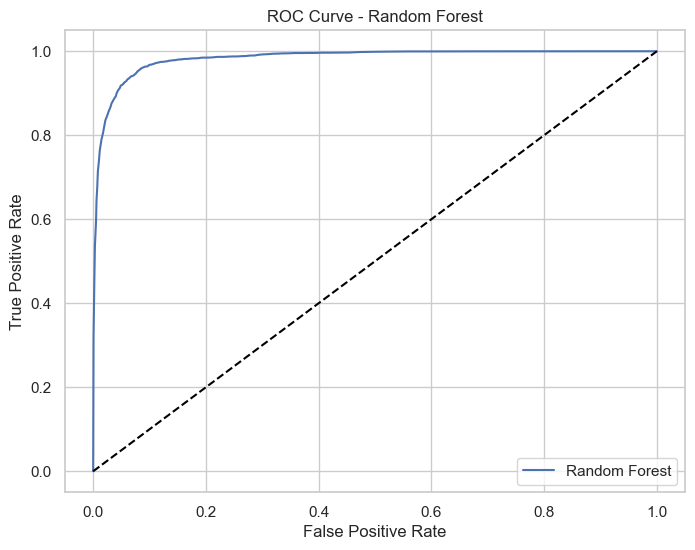

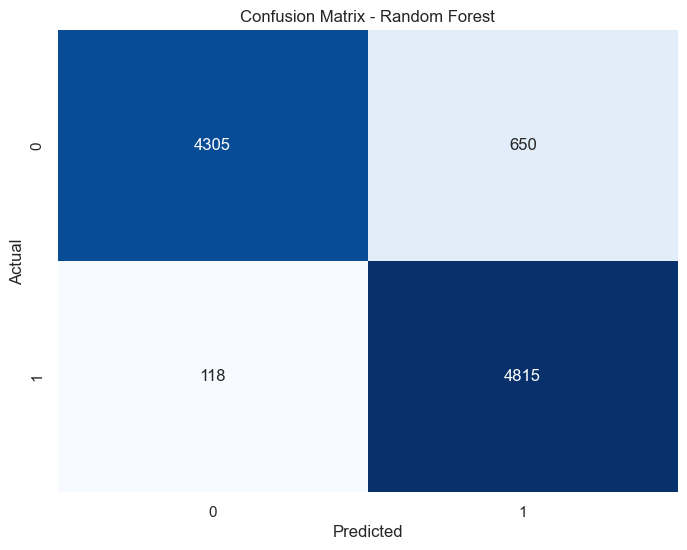

In [202]:
fpr_rf, tpr_rf, _ = roc_curve(Y_test, rf_classifier.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Confusion Matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();


In [302]:
cm_rf

array([[4305,  650],
       [ 118, 4815]], dtype=int64)

In [304]:
tp = cm_rf[1][1]
tn = cm_rf[0][0]
fp = cm_rf[0][1]
fn = cm_rf[1][0]

In [306]:
tpr_rf =  tp/(tp+fn)

In [310]:
tpr_rf

0.9760794648287047

In [308]:
fpr_rf = fp/(fp+tn)

In [312]:
fpr_rf

0.1311806256306761

## Hyperparameter tuning the model

In [207]:
# Define new ranges of hyperparameters
n_estimators = [int(x) for x in np.linspace(start=50, stop=500, num=10)]
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

# Create a base RandomForestClassifier instance
rf_base = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
rf_cv = RandomizedSearchCV(
    estimator=rf_base, param_distributions=param_dist, cv=5, random_state=42)
rf_cv.fit(X_train, Y_train)

# Check the best score and best parameters found by RandomizedSearchCV
print("Best Score:", rf_cv.best_score_)
print("Best Parameters:", rf_cv.best_params_)

# Initialize a RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(
    max_depth=rf_cv.best_params_['max_depth'],
    n_estimators=rf_cv.best_params_['n_estimators'],
    random_state=42)

# Fit the model with the best parameters to the training data
rf_best.fit(X_train, Y_train)

# Predict on the test set using the best model
Y_pred = rf_best.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42)

Best Score: 0.9106746051721737
Best Parameters: {'n_estimators': 500, 'max_depth': 40}


RandomForestClassifier(max_depth=40, n_estimators=500, random_state=42)

Accuracy: 0.9237459546925566
F1 Score: 0.9274441878367975


### Summary

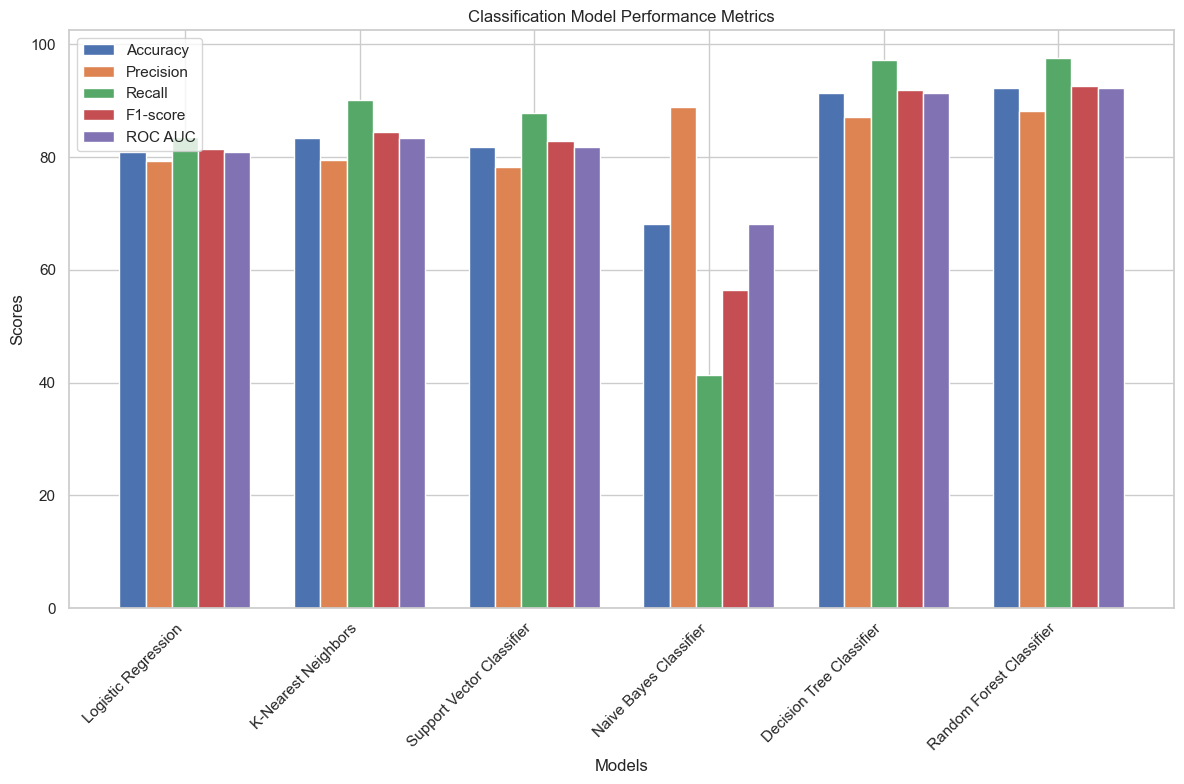

In [210]:
# Data
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier', 'Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracy_sum = [accuracy_log, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dt, accuracy_rf]
precision_sum = [precision_log, precision_knn, precision_svc, precision_nb, precision_dt, precision_rf]
recall_sum = [recall_log, recall_knn, recall_svc, recall_nb, recall_dt, recall_rf]
f1_score_sum = [f1_log, f1_knn, f1_svc, f1_nb, f1_dt, f1_rf]
roc_auc_sum = [roc_auc_log, roc_auc_knn, roc_auc_svc, roc_auc_nb, roc_auc_dt, roc_auc_rf]

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting bars for each metric
rects1 = ax.bar(x - 2*width, accuracy_sum, width, label='Accuracy')
rects2 = ax.bar(x - width, precision_sum, width, label='Precision')
rects3 = ax.bar(x, recall_sum, width, label='Recall')
rects4 = ax.bar(x + width, f1_score_sum, width, label='F1-score')
rects5 = ax.bar(x + 2*width, roc_auc_sum, width, label='ROC AUC')

# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Classification Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show();

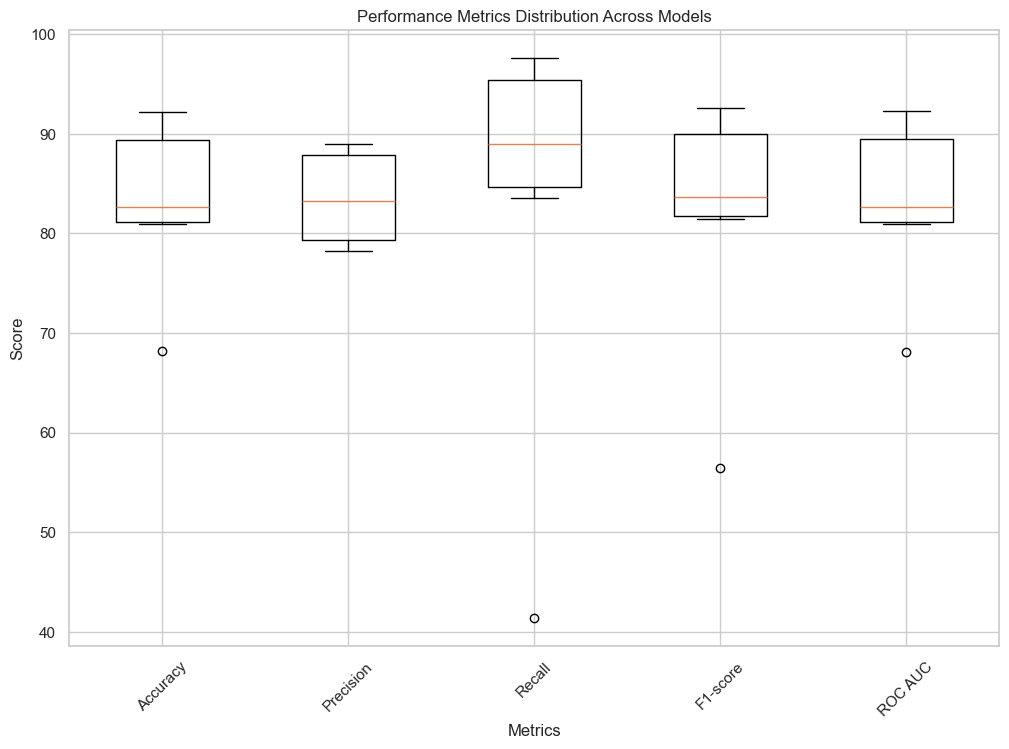

In [212]:
# Data
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier', 'Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracy_sum = [accuracy_log, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dt, accuracy_rf]
precision_sum = [precision_log, precision_knn, precision_svc, precision_nb, precision_dt, precision_rf]
recall_sum = [recall_log, recall_knn, recall_svc, recall_nb, recall_dt, recall_rf]
f1_score_sum = [f1_log, f1_knn, f1_svc, f1_nb, f1_dt, f1_rf]
roc_auc_sum = [roc_auc_log, roc_auc_knn, roc_auc_svc, roc_auc_nb, roc_auc_dt, roc_auc_rf]

# Create box plots
plt.figure(figsize=(12, 8))
plt.boxplot([accuracy_sum, precision_sum, recall_sum, f1_score_sum, roc_auc_sum], labels=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'])
plt.title('Performance Metrics Distribution Across Models')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.grid(True)
plt.show();

In [214]:
data = {
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Classifier", "Naive Bayes Classifier", "Decision Tree Classifier", "Random Forest Classifier"],
    "Accuracy": [accuracy_log, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dt, accuracy_rf],
    "Precision": [precision_log, precision_knn, precision_svc, precision_nb, precision_dt, precision_rf],
    "Recall": [recall_log, recall_knn, recall_svc, recall_nb, recall_dt, recall_rf],
    "F1-score": [f1_log, f1_knn, f1_svc, f1_nb, f1_dt, f1_rf],
    "ROC AUC": [roc_auc_log, roc_auc_knn, roc_auc_svc, roc_auc_nb, roc_auc_dt, roc_auc_rf]
}

# Create DataFrame
summary_df = pd.DataFrame(data)

summary_df

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic Regression,80.976942,79.368745,83.600243,81.429559,80.982765
1,K-Nearest Neighbors,83.454693,79.421738,90.208798,84.472285,83.469687
2,Support Vector Classifier,81.765777,78.279725,87.816744,82.774434,81.779210
3,Naive Bayes Classifier,68.193770,88.971229,41.374417,56.482635,68.134232
4,Decision Tree Classifier,91.413835,87.127273,97.141699,91.862360,91.426551
5,Random Forest Classifier,92.233010,88.106130,97.607946,92.613964,92.244942


Logistic Regression
The Logistic Regression model demonstrates balanced performance with an accuracy of 80.98%. It achieves a precision of 79.37%, signifying its ability to correctly classify positive instances. The recall score of 83.60% highlights its effectiveness in identifying most actual positive cases. With an F1-score of 81.43%, it maintains a good balance between precision and recall. Its ROC AUC score of 80.98% reflects reliable discrimination between positive and negative classes.

K-Nearest Neighbors (KNN)
The K-Nearest Neighbors model shows strong performance with an accuracy of 83.45%. It has a precision of 79.42%, indicating reasonable positive instance classification. The recall of 90.21% suggests it is highly effective at identifying actual positive cases. Its F1-score of 84.47% confirms a good trade-off between precision and recall. The model's ROC AUC score of 83.47% highlights strong discriminatory capability.

Support Vector Classifier (SVC)
The Support Vector Classifier achieves an accuracy of 81.77%. It has a precision of 78.28%, showing its ability to correctly classify positive instances. Its recall of 87.82% indicates that it identifies most positive cases effectively. The F1-score of 82.77% reflects a good balance between precision and recall. Its ROC AUC score of 81.78% demonstrates strong separation between the classes.

Naive Bayes Classifier
The Naive Bayes Classifier delivers modest performance with an accuracy of 68.19%. It achieves a precision of 88.97%, excelling in positive instance classification. However, its recall score of 41.37% is low, indicating limited success in identifying actual positive cases. This trade-off leads to a relatively low F1-score of 56.48%. The ROC AUC score of 68.13% indicates moderate discriminatory power.

Decision Tree Classifier
The Decision Tree Classifier performs well, achieving an accuracy of 91.41%. Its precision of 87.13% reflects its strength in positive instance classification. The recall of 97.14% demonstrates excellent effectiveness in identifying actual positive cases. With an F1-score of 91.86%, it balances precision and recall effectively. The ROC AUC score of 91.43% confirms its strong performance in class discrimination.

Random Forest Classifier
The Random Forest Classifier exhibits the highest overall performance with an accuracy of 92.23%. It achieves a precision of 88.11%, signifying robust positive instance classification. The recall score of 97.61% underscores its exceptional ability to identify actual positive cases. The F1-score of 92.61% demonstrates an excellent balance between precision and recall. Its ROC AUC score of 92.24% highlights its outstanding class discrimination capability.

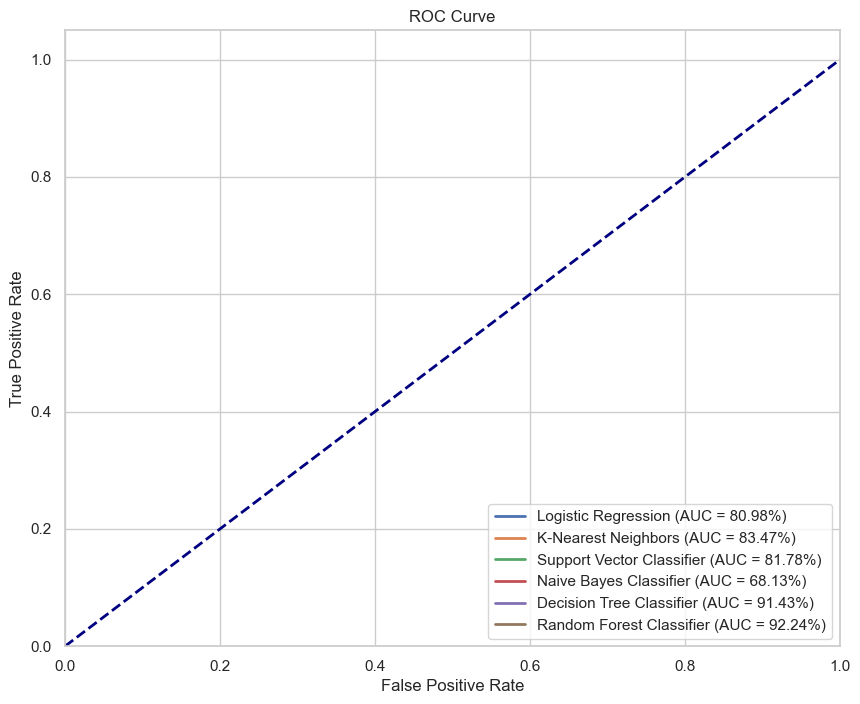

In [216]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Data
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier', 'Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier']
roc_auc = [roc_auc_log, roc_auc_knn, roc_auc_svc, roc_auc_nb, roc_auc_dt, roc_auc_rf]

# Plotting ROC curve
plt.figure(figsize=(10, 8))

for i in range(len(models)):
    plt.plot(fpr[i], tpr[i], lw=2, label='{} (AUC = {:.2f}%)'.format(models[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show();